In [41]:
from airsenal.framework.prediction_utils import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model = get_player_model()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8c4b3dae224ed40cd55af0e4da27a5f1 NOW.
/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /var/folders/xv/d5nvn2ps5r3fcf276w707n01qdmpqf/T/tmppml2d0jv/stanfit4anon_model_8c4b3dae224ed40cd55af0e4da27a5f1_8158779649765637709.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


## FWD

In [3]:
df, fit, data = fit_player_data(model, 'FWD', CURRENT_SEASON, session)

Filling history dataframe for Sergio Agüero: 0/70 done
Filling history dataframe for Harry Kane: 1/70 done
Filling history dataframe for Pierre-Emerick Aubameyang: 2/70 done
Filling history dataframe for Alexandre Lacazette: 3/70 done
Filling history dataframe for Roberto Firmino: 4/70 done
Filling history dataframe for Gabriel Fernando de Jesus: 5/70 done
Filling history dataframe for Jamie Vardy: 6/70 done
Filling history dataframe for Marcus Rashford: 7/70 done
Filling history dataframe for Romelu Lukaku: 8/70 done
Filling history dataframe for Callum Wilson: 9/70 done
Filling history dataframe for Sébastien Haller: 10/70 done
Filling history dataframe for Raúl Jiménez: 11/70 done
Filling history dataframe for Olivier Giroud: 12/70 done
Filling history dataframe for Tammy Abraham: 13/70 done
Filling history dataframe for Marko Arnautovic: 14/70 done
Filling history dataframe for Moise Kean: 15/70 done
Filling history dataframe for Teemu Pukki: 16/70 done
Filling history dataframe fo

In [21]:
df['name'] = [get_player_name(idx) for idx in df.index]
df = df[['name', 'pr_score', 'pr_assist', 'pr_neither', 'pos']] # reorder cols

In [14]:
df.sort_values(by='pr_score', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
338,Harry Kane,0.383163,0.089471,0.527366,FWD
44,Glenn Murray,0.366620,0.070015,0.563365,FWD
166,Jamie Vardy,0.348417,0.110120,0.541463,FWD
11,Pierre-Emerick Aubameyang,0.345802,0.126909,0.527288,FWD
312,Charlie Austin,0.345155,0.116202,0.538643,FWD
278,Teemu Pukki,0.337343,0.118729,0.543929,FWD
210,Sergio Agüero,0.336298,0.116494,0.547208,FWD
90,Ashley Barnes,0.335938,0.090197,0.573864,FWD
386,Javier Hernández Balcázar,0.327685,0.126016,0.546299,FWD


In [16]:
df.sort_values(by='pr_score', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
187,Roberto Firmino,0.207145,0.126852,0.666003,FWD
147,Dominic Calvert-Lewin,0.239187,0.163749,0.597064,FWD
233,Marcus Rashford,0.244247,0.133483,0.622270,FWD
468,Jordan Ayew,0.245210,0.139576,0.615215,FWD
69,Dominic Solanke,0.247876,0.130053,0.622072,FWD
167,Kelechi Iheanacho,0.251093,0.181790,0.567117,FWD
315,Shane Long,0.253932,0.118023,0.628045,FWD
339,Vincent Janssen,0.254748,0.127211,0.618041,FWD
129,Christian Benteke,0.255750,0.117612,0.626638,FWD


In [17]:
df.sort_values(by='pr_assist', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
167,Kelechi Iheanacho,0.251093,0.181790,0.567117,FWD
147,Dominic Calvert-Lewin,0.239187,0.163749,0.597064,FWD
385,Marko Arnautovic,0.280689,0.161753,0.557557,FWD
409,Raúl Jiménez,0.295337,0.156572,0.548090,FWD
410,Diogo Jota,0.272782,0.151036,0.576182,FWD
67,Callum Wilson,0.270832,0.146938,0.582230,FWD
12,Alexandre Lacazette,0.274171,0.142877,0.582952,FWD
468,Jordan Ayew,0.245210,0.139576,0.615215,FWD
110,Olivier Giroud,0.309749,0.135278,0.554973,FWD


In [18]:
df.sort_values(by='pr_assist', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
44,Glenn Murray,0.366620,0.070015,0.563365,FWD
338,Harry Kane,0.383163,0.089471,0.527366,FWD
90,Ashley Barnes,0.335938,0.090197,0.573864,FWD
91,Chris Wood,0.309405,0.090708,0.599887,FWD
68,Joshua King,0.297422,0.092603,0.609976,FWD
232,Romelu Lukaku,0.318831,0.094899,0.586271,FWD
261,Jose Luis Mato Sanmartín,0.281628,0.095103,0.623270,FWD
461,Michy Batshuayi,0.296054,0.099760,0.604186,FWD
46,Florin Andone,0.310970,0.100591,0.588439,FWD


In [20]:
df.sort_values(by='pr_neither', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
11,Pierre-Emerick Aubameyang,0.345802,0.126909,0.527288,FWD
338,Harry Kane,0.383163,0.089471,0.527366,FWD
312,Charlie Austin,0.345155,0.116202,0.538643,FWD
166,Jamie Vardy,0.348417,0.110120,0.541463,FWD
278,Teemu Pukki,0.337343,0.118729,0.543929,FWD
386,Javier Hernández Balcázar,0.327685,0.126016,0.546299,FWD
210,Sergio Agüero,0.336298,0.116494,0.547208,FWD
409,Raúl Jiménez,0.295337,0.156572,0.548090,FWD
110,Olivier Giroud,0.309749,0.135278,0.554973,FWD


In [19]:
df.sort_values(by='pr_neither', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
187,Roberto Firmino,0.207145,0.126852,0.666003,FWD
365,Isaac Success Ajayi,0.259099,0.109676,0.631226,FWD
315,Shane Long,0.253932,0.118023,0.628045,FWD
129,Christian Benteke,0.255750,0.117612,0.626638,FWD
261,Jose Luis Mato Sanmartín,0.281628,0.095103,0.623270,FWD
512,Danny Welbeck,0.257944,0.119248,0.622808,FWD
233,Marcus Rashford,0.244247,0.133483,0.622270,FWD
69,Dominic Solanke,0.247876,0.130053,0.622072,FWD
362,Troy Deeney,0.264761,0.113714,0.621524,FWD


## MID

In [22]:
df, fit, data = fit_player_data(model, 'MID', CURRENT_SEASON, session)

Filling history dataframe for Mohamed Salah: 0/218 done
Filling history dataframe for Raheem Sterling: 1/218 done
Filling history dataframe for Sadio Mané: 2/218 done
Filling history dataframe for Kevin De Bruyne: 3/218 done
Filling history dataframe for Heung-Min Son: 4/218 done
Filling history dataframe for Nicolas Pépé: 5/218 done
Filling history dataframe for Leroy Sané: 6/218 done
Filling history dataframe for Christian Eriksen: 7/218 done
Filling history dataframe for Paul Pogba: 8/218 done
Filling history dataframe for Riyad Mahrez: 9/218 done
Filling history dataframe for Bamidele Alli: 10/218 done
Filling history dataframe for Richarlison de Andrade: 11/218 done
Filling history dataframe for Gylfi Sigurdsson: 12/218 done
Filling history dataframe for Bernardo Mota Veiga de Carvalho e Silva: 13/218 done
Filling history dataframe for Anthony Martial: 14/218 done
Filling history dataframe for Christian Pulisic: 15/218 done
Filling history dataframe for Lucas Rodrigues Moura da Si

Filling history dataframe for Jean-Philippe Gbamin: 137/218 done
Filling history dataframe for Wilfred Ndidi: 138/218 done
Filling history dataframe for Andreas Pereira: 139/218 done
Filling history dataframe for Scott McTominay: 140/218 done
Filling history dataframe for Jonjo Shelvey: 141/218 done
Filling history dataframe for Sean Longstaff: 142/218 done
Filling history dataframe for Rolando Aarons: 143/218 done
Filling history dataframe for Kenny McLean: 144/218 done
Filling history dataframe for Oliver Norwood: 145/218 done
Filling history dataframe for Victor Wanyama: 146/218 done
Filling history dataframe for Moussa Sissoko: 147/218 done
Filling history dataframe for Eric Dier: 148/218 done
Filling history dataframe for Georges-Kévin Nkoudou: 149/218 done
Filling history dataframe for Etienne Capoue: 150/218 done
Filling history dataframe for Declan Rice: 151/218 done
Filling history dataframe for Mark Noble: 152/218 done
Filling history dataframe for Morgan Gibbs-White: 153/218

In [23]:
df['name'] = [get_player_name(idx) for idx in df.index]
df = df[['name', 'pr_score', 'pr_assist', 'pr_neither', 'pos']] # reorder cols

In [24]:
df.sort_values(by='pr_score', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
191,Mohamed Salah,0.270216,0.136018,0.593766,MID
342,Heung-Min Son,0.209518,0.150627,0.639855,MID
192,Sadio Mané,0.201992,0.099879,0.698129,MID
239,Anthony Martial,0.201660,0.153632,0.644708,MID
240,Alexis Sánchez,0.199478,0.162560,0.637962,MID
265,Ayoze Pérez,0.190778,0.107794,0.701428,MID
214,Raheem Sterling,0.184200,0.182564,0.633236,MID
150,Richarlison de Andrade,0.172564,0.126744,0.700692,MID
134,Luka Milivojevic,0.170961,0.061360,0.767680,MID


In [25]:
df.sort_values(by='pr_score', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
247,Nemanja Matic,0.038883,0.065951,0.895166,MID
198,Jordan Henderson,0.041942,0.066670,0.891388,MID
349,Moussa Sissoko,0.042909,0.086704,0.870387,MID
119,N'Golo Kanté,0.048686,0.054705,0.896609,MID
350,Eric Dier,0.048825,0.038224,0.912951,MID
156,Idrissa Gueye,0.049310,0.067859,0.882831,MID
221,Fernando Luiz Rosa,0.050006,0.051841,0.898154,MID
102,Jack Cork,0.052115,0.060601,0.887284,MID
79,Lewis Cook,0.053444,0.091401,0.855155,MID


In [26]:
df.sort_values(by='pr_assist', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
215,Kevin De Bruyne,0.085864,0.203022,0.711115,MID
96,Johann Berg Gudmundsson,0.101260,0.196107,0.702633,MID
75,Ryan Fraser,0.118982,0.183151,0.697867,MID
214,Raheem Sterling,0.184200,0.182564,0.633236,MID
343,Christian Eriksen,0.122327,0.179233,0.698440,MID
133,Wilfried Zaha,0.160562,0.178057,0.661381,MID
216,Leroy Sané,0.135526,0.176682,0.687792,MID
389,Michail Antonio,0.163354,0.173592,0.663054,MID
98,Robbie Brady,0.091749,0.163246,0.745005,MID


In [27]:
df.sort_values(by='pr_assist', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
350,Eric Dier,0.048825,0.038224,0.912951,MID
328,Oriol Romeu Vidal,0.057800,0.042557,0.899643,MID
395,Declan Rice,0.061233,0.050466,0.888301,MID
221,Fernando Luiz Rosa,0.050006,0.051841,0.898154,MID
348,Victor Wanyama,0.075389,0.054241,0.870370,MID
118,Jorge Luiz Frello Filho,0.065839,0.054259,0.879902,MID
119,N'Golo Kanté,0.048686,0.054705,0.896609,MID
21,Matteo Guendouzi,0.055925,0.060557,0.883518,MID
102,Jack Cork,0.052115,0.060601,0.887284,MID


In [28]:
df.sort_values(by='pr_neither', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
191,Mohamed Salah,0.270216,0.136018,0.593766,MID
214,Raheem Sterling,0.184200,0.182564,0.633236,MID
240,Alexis Sánchez,0.199478,0.162560,0.637962,MID
342,Heung-Min Son,0.209518,0.150627,0.639855,MID
239,Anthony Martial,0.201660,0.153632,0.644708,MID
133,Wilfried Zaha,0.160562,0.178057,0.661381,MID
389,Michail Antonio,0.163354,0.173592,0.663054,MID
151,Gylfi Sigurdsson,0.167716,0.154909,0.677375,MID
77,Junior Stanislas,0.163143,0.151356,0.685501,MID


In [29]:
df.sort_values(by='pr_neither', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
350,Eric Dier,0.048825,0.038224,0.912951,MID
328,Oriol Romeu Vidal,0.057800,0.042557,0.899643,MID
221,Fernando Luiz Rosa,0.050006,0.051841,0.898154,MID
119,N'Golo Kanté,0.048686,0.054705,0.896609,MID
247,Nemanja Matic,0.038883,0.065951,0.895166,MID
198,Jordan Henderson,0.041942,0.066670,0.891388,MID
395,Declan Rice,0.061233,0.050466,0.888301,MID
102,Jack Cork,0.052115,0.060601,0.887284,MID
21,Matteo Guendouzi,0.055925,0.060557,0.883518,MID


## DEF

In [30]:
df, fit, data = fit_player_data(model, 'DEF', CURRENT_SEASON, session)

Filling history dataframe for Andrew Robertson: 0/183 done
Filling history dataframe for Trent Alexander-Arnold: 1/183 done
Filling history dataframe for Virgil van Dijk: 2/183 done
Filling history dataframe for Aymeric Laporte: 3/183 done
Filling history dataframe for Marcos Alonso: 4/183 done
Filling history dataframe for David Luiz Moreira Marinho: 5/183 done
Filling history dataframe for Antonio Rüdiger: 6/183 done
Filling history dataframe for César Azpilicueta: 7/183 done
Filling history dataframe for Lucas Digne: 8/183 done
Filling history dataframe for Ricardo Domingos Barbosa Pereira: 9/183 done
Filling history dataframe for Kyle Walker: 10/183 done
Filling history dataframe for Benjamin Mendy: 11/183 done
Filling history dataframe for Matt Doherty: 12/183 done
Filling history dataframe for Yerry Mina: 13/183 done
Filling history dataframe for Aaron Wan-Bissaka: 14/183 done
Filling history dataframe for Héctor Bellerín: 15/183 done
Filling history dataframe for Kieran Tierney:

Filling history dataframe for Maya Yoshida: 141/183 done
Filling history dataframe for Wesley Hoedt: 142/183 done
Filling history dataframe for Kevin Danso: 143/183 done
Filling history dataframe for Francisco Femenía Far: 144/183 done
Filling history dataframe for Craig Cathcart: 145/183 done
Filling history dataframe for Angelo Ogbonna: 146/183 done
Filling history dataframe for Arthur Masuaku: 147/183 done
Filling history dataframe for Ryan Fredericks: 148/183 done
Filling history dataframe for Issa Diop: 149/183 done
Filling history dataframe for Fabián Balbuena: 150/183 done
Filling history dataframe for Rúben Gonçalo Silva Nascimento Vinagre: 151/183 done
Filling history dataframe for Romain Saïss: 152/183 done
Filling history dataframe for Konstantinos Mavropanos: 153/183 done
Filling history dataframe for James Chester: 154/183 done
Filling history dataframe for Matt Targett: 155/183 done
Filling history dataframe for Frédéric Guilbert: 156/183 done
Filling history dataframe fo

In [31]:
df['name'] = [get_player_name(idx) for idx in df.index]
df = df[['name', 'pr_score', 'pr_assist', 'pr_neither', 'pos']] # reorder cols

In [32]:
df.sort_values(by='pr_score', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
123,Patrick van Aanholt,0.088639,0.037734,0.873627,DEF
103,Marcos Alonso,0.066086,0.071191,0.862724,DEF
259,Ciaran Clark,0.061802,0.034557,0.903640,DEF
439,Craig Dawson,0.053503,0.025778,0.920719,DEF
59,Nathan Aké,0.052589,0.038474,0.908937,DEF
252,Fabian Schär,0.050423,0.033589,0.915988,DEF
405,Willy Boly,0.046409,0.022037,0.931553,DEF
124,James Tomkins,0.046362,0.019624,0.934014,DEF
401,Matt Doherty,0.045864,0.083178,0.870959,DEF


In [33]:
df.sort_values(by='pr_score', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
207,John Stones,0.005845,0.011808,0.982348,DEF
62,Simon Francis,0.007035,0.037110,0.955855,DEF
203,Kyle Walker,0.007462,0.055145,0.937393,DEF
85,Matthew Lowton,0.007475,0.045516,0.947009,DEF
231,Phil Jones,0.007561,0.021430,0.971009,DEF
378,Arthur Masuaku,0.008376,0.057813,0.933811,DEF
447,Erik Pieters,0.008615,0.052452,0.938933,DEF
128,Martin Kelly,0.008652,0.031558,0.959790,DEF
184,Joseph Gomez,0.008725,0.031825,0.959451,DEF


In [34]:
df.sort_values(by='pr_assist', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
251,Matt Ritchie,0.043299,0.121522,0.835179,DEF
334,Kieran Trippier,0.013003,0.113641,0.873357,DEF
182,Trent Alexander-Arnold,0.017049,0.102873,0.880078,DEF
353,José Holebas,0.036038,0.101143,0.862819,DEF
159,Ricardo Domingos Barbosa Pereira,0.027043,0.087795,0.885162,DEF
181,Andrew Robertson,0.013159,0.087561,0.899280,DEF
3,Sead Kolasinac,0.020251,0.084562,0.895187,DEF
401,Matt Doherty,0.045864,0.083178,0.870959,DEF
204,Benjamin Mendy,0.010657,0.082231,0.907111,DEF


In [35]:
df.sort_values(by='pr_assist', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
185,Joel Matip,0.023273,0.011052,0.965675,DEF
331,Toby Alderweireld,0.010026,0.011164,0.978810,DEF
207,John Stones,0.005845,0.011808,0.982348,DEF
503,Gary Cahill,0.038624,0.013266,0.948110,DEF
330,Jan Vertonghen,0.008912,0.013917,0.977171,DEF
7,Laurent Koscielny,0.039827,0.016858,0.943315,DEF
208,Nicolás Otamendi,0.023426,0.016865,0.959709,DEF
228,Eric Bailly,0.015468,0.017226,0.967307,DEF
356,Adrian Mariappa,0.009361,0.018911,0.971727,DEF


In [36]:
df.sort_values(by='pr_neither', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
251,Matt Ritchie,0.043299,0.121522,0.835179,DEF
103,Marcos Alonso,0.066086,0.071191,0.862724,DEF
353,José Holebas,0.036038,0.101143,0.862819,DEF
401,Matt Doherty,0.045864,0.083178,0.870959,DEF
334,Kieran Trippier,0.013003,0.113641,0.873357,DEF
123,Patrick van Aanholt,0.088639,0.037734,0.873627,DEF
182,Trent Alexander-Arnold,0.017049,0.102873,0.880078,DEF
141,Lucas Digne,0.044450,0.072114,0.883436,DEF
159,Ricardo Domingos Barbosa Pereira,0.027043,0.087795,0.885162,DEF


In [37]:
df.sort_values(by='pr_neither', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
207,John Stones,0.005845,0.011808,0.982348,DEF
331,Toby Alderweireld,0.010026,0.011164,0.978810,DEF
330,Jan Vertonghen,0.008912,0.013917,0.977171,DEF
356,Adrian Mariappa,0.009361,0.018911,0.971727,DEF
231,Phil Jones,0.007561,0.021430,0.971009,DEF
108,Andreas Christensen,0.009697,0.019589,0.970714,DEF
403,Conor Coady,0.010270,0.020748,0.968982,DEF
255,Paul Dummett,0.010781,0.021780,0.967440,DEF
41,Gaëtan Bong,0.010788,0.021793,0.967418,DEF


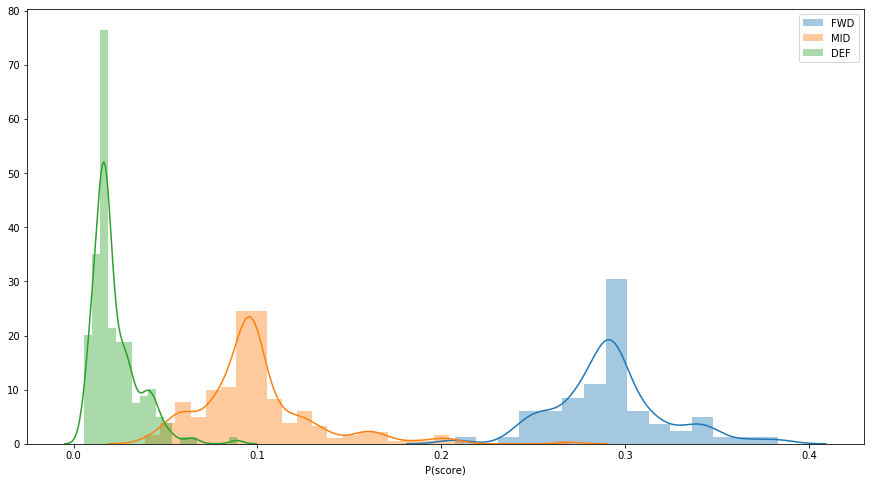

In [43]:
plt.figure(figsize=(15,8))
sns.distplot(df_fwd['pr_score'], label='FWD')
sns.distplot(df_mid['pr_score'], label='MID')
sns.distplot(df_def['pr_score'], label='DEF')
plt.xlabel('P(score)')
plt.legend()

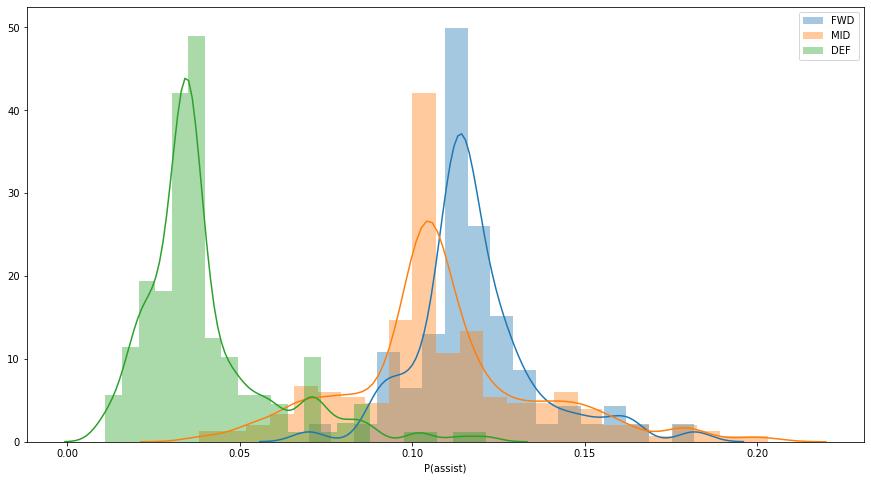

In [44]:
plt.figure(figsize=(15,8))
sns.distplot(df_fwd['pr_assist'], label='FWD')
sns.distplot(df_mid['pr_assist'], label='MID')
sns.distplot(df_def['pr_assist'], label='DEF')
plt.xlabel('P(assist)')
plt.legend()

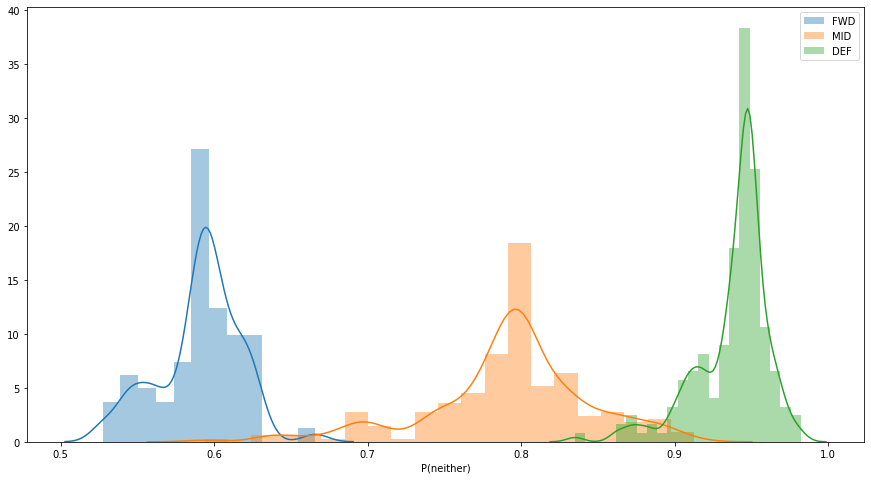

In [42]:
plt.figure(figsize=(15,8))
sns.distplot(df_fwd['pr_neither'], label='FWD')
sns.distplot(df_mid['pr_neither'], label='MID')
sns.distplot(df_def['pr_neither'], label='DEF')
plt.xlabel('P(neither)')
plt.legend()